In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

In [2]:
from uk_covid19 import Cov19API,api_interface,data_format

# Cases in United Kingdom

In [3]:
cases = {
    "date":"date",
    "newCases":"newCasesByPublishDate",
    "newCumCases":"cumCasesByPublishDate",

    
}
all_nations = [
    "areaType=overview"
]

api = Cov19API(
    filters=all_nations,
    structure=cases,
    #latest_by="newCasesByPublishDate"
)

data = api.get_json()

In [4]:
Uk_data = pd.DataFrame(data['data'])

In [5]:
Uk_data.head()

,date,newCases,newCumCases
0,2020-12-21,33364,2073511.0
1,2020-12-20,35928,2040147.0
2,2020-12-19,27052,2004219.0
3,2020-12-18,28507,1977167.0
4,2020-12-17,35383,1948660.0


In [6]:
Uk_data['newCumCases'] = Uk_data['newCumCases'].fillna(0.0).astype('int')

In [7]:
Uk_data = Uk_data.loc[Uk_data['date']>='2020-02-01'].sort_values(by='date',ascending=True)


In [8]:
Uk_data.loc[Uk_data['date']=='2020-02-01']
dates = ['01 Feb','01 Mar','01 Apr','01 May','01 Jun','01 Jul','01 Aug','01 Sep','01 Oct','01 Nov']

In [9]:
#import numpy as np
#x = np.array_split(Uk_data['newCases'].to_list(),Uk_data.shape[0]/5)
#mylist=[]
#for i in range(0,len(x)):
    #mylist.append(np.average(x[i]))

In [10]:
x = Uk_data['newCases'].to_list()
mylist=[]
for i in range(0,len(x)-3):
    av = sum(x[i-3:i+4])/7
    mylist.append(av)

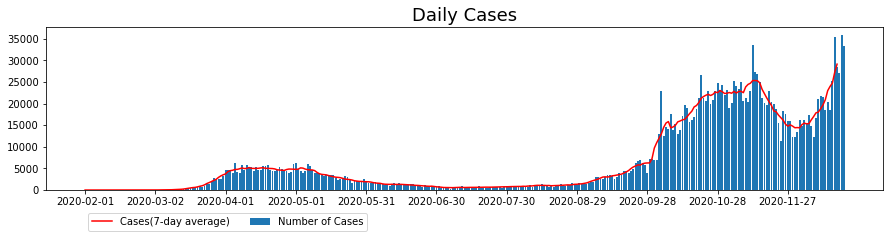

In [11]:
plt.figure(figsize=(15,3))
plt.bar(x=Uk_data['date'], height=Uk_data['newCases'],label='Number of Cases')
plt.plot(Uk_data['date'][:-3],mylist,color = 'red',label='Cases(7-day average)')
plt.xticks(ticks= Uk_data['date'][::30])
plt.legend(ncol=2,bbox_to_anchor=(0.05, -0.25),loc='lower left',borderaxespad=0.)
plt.title("Daily Cases",fontdict = {"fontsize":"18"})
plt.show()

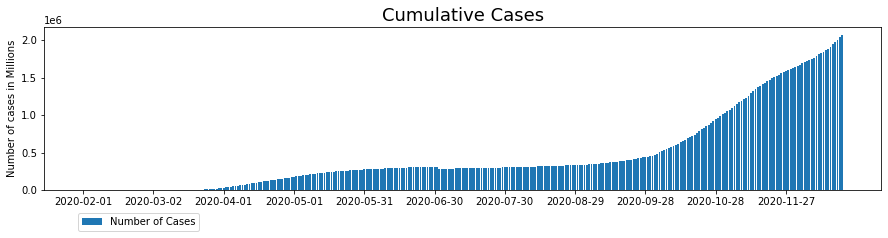

In [12]:
plt.figure(figsize=(15,3))
plt.bar(x=Uk_data['date'], height=Uk_data['newCumCases'],label='Number of Cases')
plt.xticks(ticks= Uk_data['date'][::30])
plt.ylabel('Number of cases in Millions')
plt.legend(ncol=2,bbox_to_anchor=(0.04, -0.25),loc='lower left',borderaxespad=0.)
plt.title("Cumulative Cases",fontdict = {"fontsize":"18"})
plt.show()

# Deaths in United Kingdom

In [13]:
deaths = {
    "date":"date",
    "newDeaths":"newDeaths28DaysByPublishDate",
    "newCumDeaths":"cumDeaths28DaysByPublishDate",

    
}
all_nations = [
    "areaType=overview"
]

api = Cov19API(
    filters=all_nations,
    structure=deaths,
    #latest_by="newCasesByPublishDate"
)

data_deaths = api.get_json()


In [14]:
Uk_deaths_data = pd.DataFrame(data_deaths['data'])
Uk_deaths_data['newCumDeaths'] = Uk_deaths_data['newCumDeaths'].fillna(0.0).astype('int')
Uk_deaths_data = Uk_deaths_data.loc[Uk_deaths_data['date']>='2020-02-01'].sort_values(by='date',ascending=True)

In [15]:
Uk_deaths_data.head()

,date,newDeaths,newCumDeaths
324,2020-02-01,0,0
323,2020-02-02,0,0
322,2020-02-03,0,0
321,2020-02-04,0,0
320,2020-02-05,0,0


In [16]:
dths = Uk_deaths_data['newDeaths'].to_list()
mylist2=[]
for i in range(0,len(dths)-3):
    av2 = sum(dths[i-3:i+4])/7
    mylist2.append(av2)

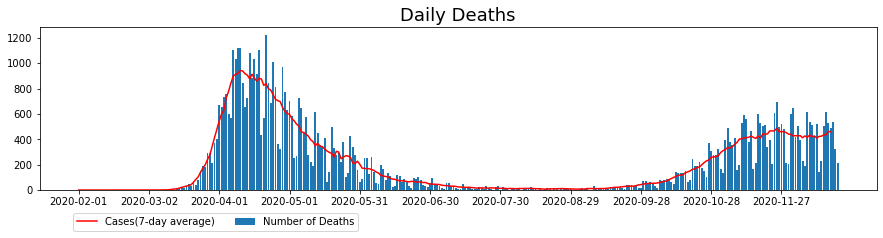

In [17]:
plt.figure(figsize=(15,3))
plt.bar(x=Uk_deaths_data['date'], height=Uk_deaths_data['newDeaths'],label='Number of Deaths')
plt.plot(Uk_deaths_data['date'][:-3],mylist2,color = 'red',label='Cases(7-day average)')
plt.xticks(ticks= Uk_deaths_data['date'][::30])
plt.legend(ncol=2,bbox_to_anchor=(0.04, -0.25),loc='lower left',borderaxespad=0.)
plt.title("Daily Deaths",fontdict = {"fontsize":"18"})
plt.show()

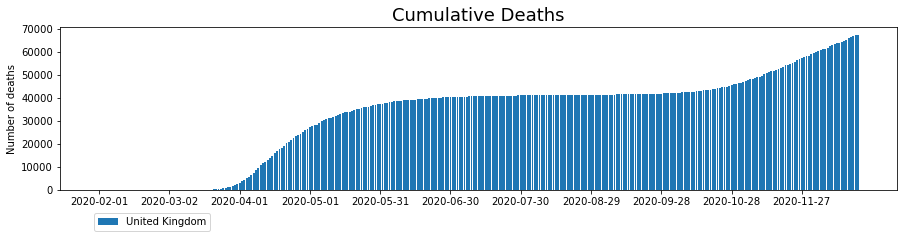

In [18]:
plt.figure(figsize=(15,3))
plt.bar(x=Uk_deaths_data['date'], height=Uk_deaths_data['newCumDeaths'],label='United Kingdom')
plt.xticks(ticks= Uk_deaths_data['date'][::30])
plt.ylabel('Number of deaths')
plt.legend(ncol=2,bbox_to_anchor=(0.04, -0.25),loc='lower left',borderaxespad=0.)
plt.title("Cumulative Deaths",fontdict = {"fontsize":"18"})
plt.show()

# Tests Conducted

In [19]:
test_conduct = {
    "date":"date",
    "newTests":"newTestsByPublishDate",
    "newCumTests":"cumTestsByPublishDate",


}
all_nations = [
    "areaType=overview"
]

api = Cov19API(
    filters=all_nations,
    structure=test_conduct,
    #latest_by="newCasesByPublishDate"
)

data_tests = api.get_json()

In [20]:
Uk_tests = pd.DataFrame(data_tests['data'])
Uk_tests = Uk_tests.sort_values(by='date',ascending=True)

In [21]:
Uk_tests

,date,newTests,newCumTests
264,2020-03-31,11896,155174
263,2020-04-01,11947,167237
262,2020-04-02,13623,182352
261,2020-04-03,14629,223578
260,2020-04-04,16080,239658
...,...,...,...
4,2020-12-16,368542,49178863
3,2020-12-17,378279,49579548
2,2020-12-18,394152,49974714
1,2020-12-19,442246,50417102


In [22]:
#Finding 7-day average my finding sum of 7 days and dividing by 7
tests = Uk_tests['newTests'].to_list()
mylist3=[]
for i in range(0,len(tests)-3):
    av3 = sum(tests[i-3:i+4])/7      #Finds the sum of 3 days ahead,before and current day and then divides by 7
    mylist3.append(av3)

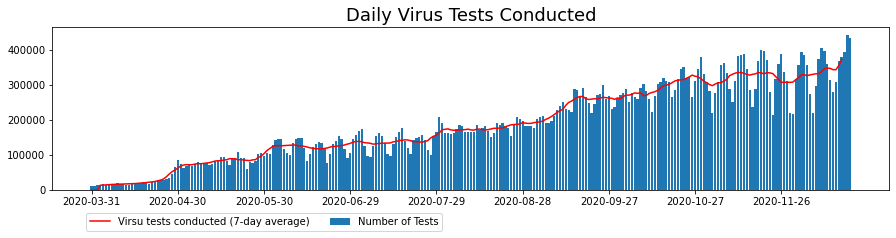

In [23]:
#Using matplotlib to plot the table
plt.figure(figsize=(15,3))
plt.bar(x=Uk_tests['date'], height=Uk_tests['newTests'],label='Number of Tests')
plt.plot(Uk_tests['date'][:-3],mylist3,color = 'red',label='Virsu tests conducted (7-day average)')
plt.xticks(ticks= Uk_tests['date'][::30])
plt.legend(ncol=2,bbox_to_anchor=(0.04, -0.25),loc='lower left',borderaxespad=0.)
plt.title("Daily Virus Tests Conducted",fontdict = {"fontsize":"18"})
plt.show()

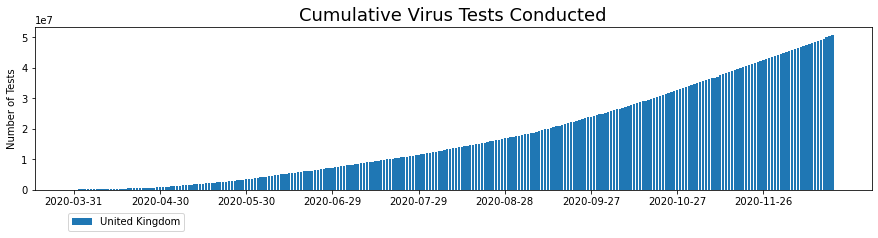

In [24]:
plt.figure(figsize=(15,3))
plt.bar(x=Uk_tests['date'], height=Uk_tests['newCumTests'],label='United Kingdom')
plt.xticks(ticks= Uk_tests['date'][::30])
plt.ylabel('Number of Tests')
plt.legend(ncol=2,bbox_to_anchor=(0.04, -0.25),loc='lower left',borderaxespad=0.)
plt.title("Cumulative Virus Tests Conducted",fontdict = {"fontsize":"18"})
plt.show()

# Patients Admitted to Hospital

In [25]:
patients_adm = {
    "date":"date",
    "newAdmission":"newAdmissions",
    "CumulativeAdmissions":"cumAdmissions",
}
all_nations = [
    "areaType=overview"
]

api = Cov19API(
    filters=all_nations,
    structure=patients_adm,
)

patients_data = api.get_json()

In [26]:
Uk_patients = pd.DataFrame(patients_data['data'])
Uk_patients.head()

,date,newAdmission,CumulativeAdmissions
0,2020-12-16,2034,249471
1,2020-12-15,1907,247437
2,2020-12-14,1931,245530
3,2020-12-13,1727,243599
4,2020-12-12,1774,241872


In [27]:
Uk_patients = Uk_patients.sort_values(by='date',ascending=True)

In [28]:
patients = Uk_patients['newAdmission'].to_list()
mylist4=[]
for i in range(0,len(patients)-3):
    av4 = sum(patients[i-3:i+4])/7
    mylist4.append(av4)

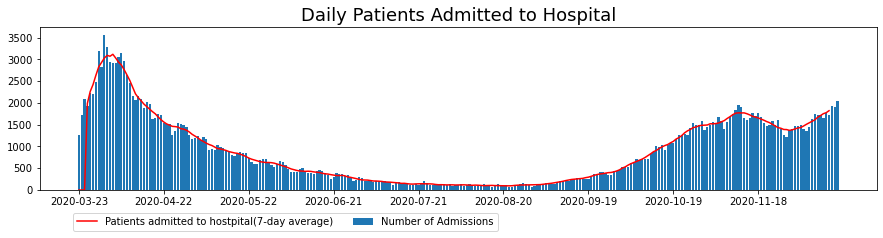

In [29]:
plt.figure(figsize=(15,3))
plt.bar(x=Uk_patients['date'], height=Uk_patients['newAdmission'],label='Number of Admissions')
plt.plot(Uk_patients['date'][:-3],mylist4,color = 'red',label='Patients admitted to hostpital(7-day average)')
plt.xticks(ticks= Uk_patients['date'][::30])
plt.legend(ncol=2,bbox_to_anchor=(0.04, -0.25),loc='lower left',borderaxespad=0.)
plt.title("Daily Patients Admitted to Hospital",fontdict = {"fontsize":"18"})
plt.show()

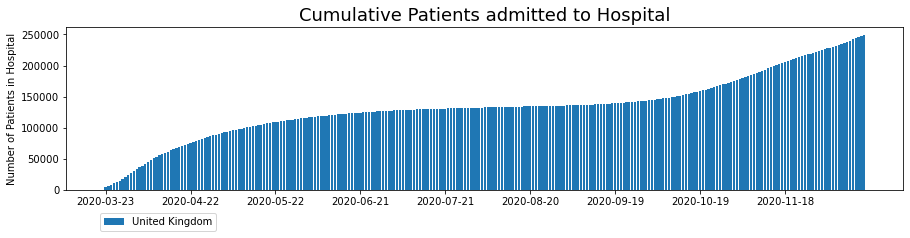

In [30]:
plt.figure(figsize=(15,3))
plt.bar(x=Uk_patients['date'], height=Uk_patients['CumulativeAdmissions'],label='United Kingdom')
plt.xticks(ticks= Uk_patients['date'][::30])
plt.ylabel('Number of Patients in Hospital')
plt.legend(ncol=2,bbox_to_anchor=(0.04, -0.25),loc='lower left',borderaxespad=0.)
plt.title("Cumulative Patients admitted to Hospital",fontdict = {"fontsize":"18"})
plt.show()

In [31]:
hospital = {
    "date":"date",
    "hospitalCases":"hospitalCases",
}
all_nations = [
    "areaType=overview"
]

api = Cov19API(
    filters=all_nations,
    structure=hospital,
)

hostpital_data = api.get_json()

In [32]:
Uk_hostpital = pd.DataFrame(hostpital_data['data'])
Uk_hostpital.head()

,date,hospitalCases
0,2020-12-17,18771
1,2020-12-16,18502
2,2020-12-15,18054
3,2020-12-14,18103
4,2020-12-13,17401


In [33]:
Uk_hostpital = Uk_hostpital.sort_values(by='date',ascending=True)
hostpital = Uk_hostpital['hospitalCases'].to_list()
mylist5=[]
for i in range(0,len(hostpital)-3):
    av5 = sum(hostpital[i-3:i+4])/7
    mylist5.append(av5)

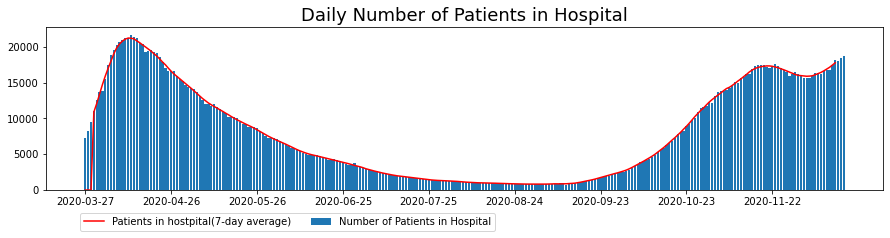

In [34]:
plt.figure(figsize=(15,3))
plt.bar(x=Uk_hostpital['date'], height=Uk_hostpital['hospitalCases'],label='Number of Patients in Hospital')
plt.plot(Uk_hostpital['date'][:-3],mylist5,color = 'red',label='Patients in hostpital(7-day average)')
plt.xticks(ticks= Uk_hostpital['date'][::30])
plt.legend(ncol=2,bbox_to_anchor=(0.04, -0.25),loc='lower left',borderaxespad=0.)
plt.title("Daily Number of Patients in Hospital",fontdict = {"fontsize":"18"})
plt.show()

In [35]:
nation = {
    "date":"date",
    "Region":"areaName",
    "newDeaths":"newDeaths28DaysByPublishDate",

}
all_nations = [
    "areaType=nation"
]

api = Cov19API(
    filters=all_nations,
    structure=nation,
)

nation_data = api.get_json()

In [36]:
Uk_nation = pd.DataFrame(nation_data['data'])
Uk_nation.head()


,date,Region,newDeaths
0,2020-12-21,England,198
1,2020-12-20,England,241
2,2020-12-19,England,441
3,2020-12-18,England,403
4,2020-12-17,England,438


In [37]:
nations_sum = Uk_nation.groupby(by='Region').sum()

<AxesSubplot:xlabel='Nations', ylabel='Number of Deaths'>

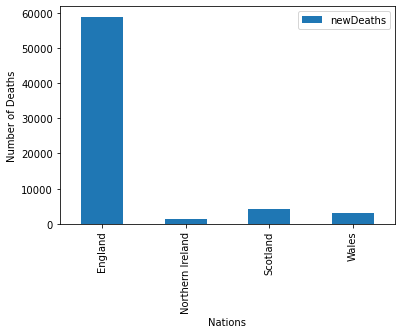

In [38]:
nations_sum.plot(kind='bar',ylabel="Number of Deaths", xlabel='Nations')

In [39]:
eng = {
    "date":"date",
    "Region":"areaName",
    "newDeaths":"newDeaths28DaysByPublishDate",

}
all_nations = [
    "areaType=utla",
]

api = Cov19API(
    filters=all_nations,
    structure=eng,
)

eng_data = api.get_json()

In [40]:
Uk_eng = pd.DataFrame(eng_data['data'])
Uk_eng

,date,Region,newDeaths
0,2020-12-21,Aberdeen City,0
1,2020-12-20,Aberdeen City,0
2,2020-12-19,Aberdeen City,3
3,2020-12-18,Aberdeen City,2
4,2020-12-17,Aberdeen City,4
...,...,...,...
76105,2020-01-07,York,0
76106,2020-01-06,York,0
76107,2020-01-05,York,0
76108,2020-01-04,York,0


In [43]:
top_ten_table = Uk_eng.groupby(by='Region').sum().sort_values(by='newDeaths', ascending=False).head(10)
top_ten_table

,newDeaths
Region,
Lancashire,944
Kent,700
Staffordshire,642
Lincolnshire,616
Birmingham,568
Nottinghamshire,470
Essex,433
Leeds,427
Derbyshire,418


<AxesSubplot:xlabel='Region'>

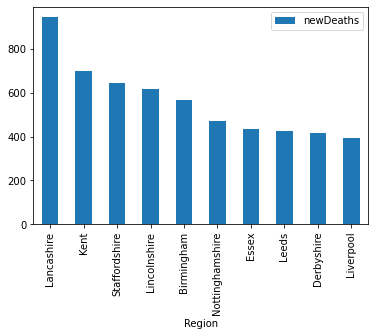

In [44]:
top_ten_table.plot(kind='bar')